# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [258]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [259]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Notebook Presentation

In [260]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [261]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [262]:
print(df_data.shape)
print(df_data.columns)

(2000, 96)
Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBAR

In [263]:
print(df_data.isna().sum().sort_values(ascending=False))

PRMONF      1073
PRMONM       879
PRFSTYAE     790
PRFSTYAN     790
PRFSTYUN     790
            ... 
EDUCHSD        0
EDUCAA         0
EDUCBA         0
EDUCMAST       0
MSA11NIC       0
Length: 96, dtype: int64


In [264]:
df_data = df_data.fillna(0)
print(df_data.isna().sum().sort_values(ascending=False))


ID          0
EARNINGS    0
REG97NE     0
SIBLINGS    0
SMR         0
           ..
EDUCHSD     0
EDUCAA      0
EDUCBA      0
EDUCMAST    0
MSA11NIC    0
Length: 96, dtype: int64


In [265]:
print(df_data.duplicated().sum())

513


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [266]:
df_data = df_data.drop_duplicates()
print(df_data.duplicated().sum())

0


## Descriptive Statistics

In [267]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,25.72,"47,252.43",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,6.38,"45,629.92",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,22.00,"13,740.50",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"41,840.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"66,400.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [268]:
Y = df_data.EARNINGS
X = df_data.drop(['EARNINGS'], axis=1)
X = X[['BYEAR']]
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

      BYEAR
0      1984
1      1982
2      1981
3      1983
4      1984
...     ...
1984   1982
1989   1982
1991   1984
1994   1984
1995   1982

[1487 rows x 1 columns]


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [269]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [270]:
# Create a DataFrame to store the column names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Column': X.columns, 'Coefficient': model.coef_})

# Print the coefficients
print(coefficients_df)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

  Column  Coefficient
0  BYEAR        -0.73
Mean Squared Error: 118.63035460569844
Mean Absolute Error: 7.969216475031799
R-squared: 0.0003797649955173954


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

<Axes: xlabel='EARNINGS'>

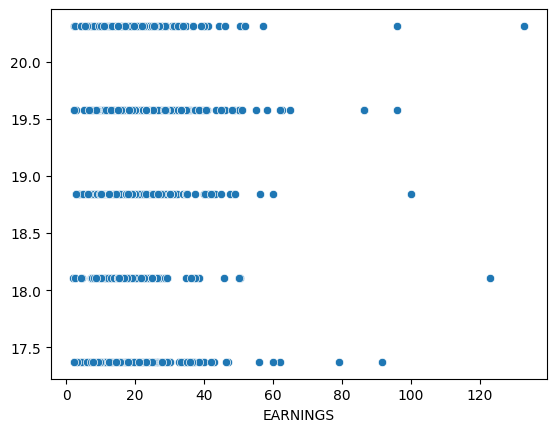

In [271]:
predicted_values = model.predict(X_train)
residuals = (y_train - predicted_values)
sns.scatterplot(x=y_train, y=predicted_values)

<Axes: ylabel='EARNINGS'>

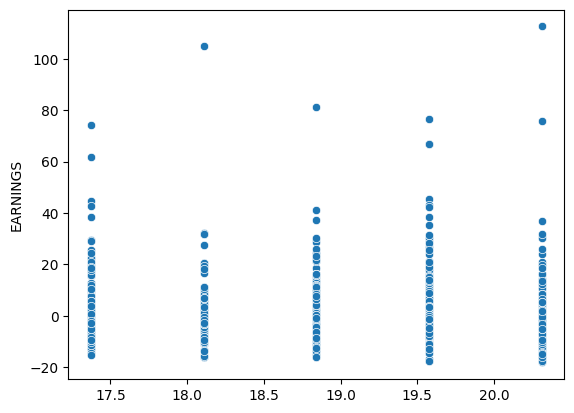

In [272]:
sns.scatterplot(x=predicted_values, y=residuals)

In [273]:
print(residuals.mean())
print(residuals.skew())

-3.108699168565215e-14
3.1243887582078878


# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [274]:
Y = df_data.EARNINGS
X = df_data.drop(['EARNINGS'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [275]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 95.1825513255407
Mean Absolute Error: 7.003308411984312
R-squared: 0.11475044495872566


### Evaluate the Coefficients of the Model

In [276]:
# Create a DataFrame to store the column names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Column': X.columns, 'Coefficient': model.coef_})

# Print the coefficients
print(coefficients_df)

      Column  Coefficient
0         ID        -0.00
1          S         1.04
2        EXP         0.81
3     FEMALE        -1.01
4       MALE         1.00
..       ...          ...
90   MSA11NO        -2.73
91  MSA11NCC        -3.80
92   MSA11CC        -2.50
93   MSA11NK         9.03
94  MSA11NIC         0.00

[95 rows x 2 columns]


### Analyse the Estimated Values & Regression Residuals

<Axes: xlabel='EARNINGS'>

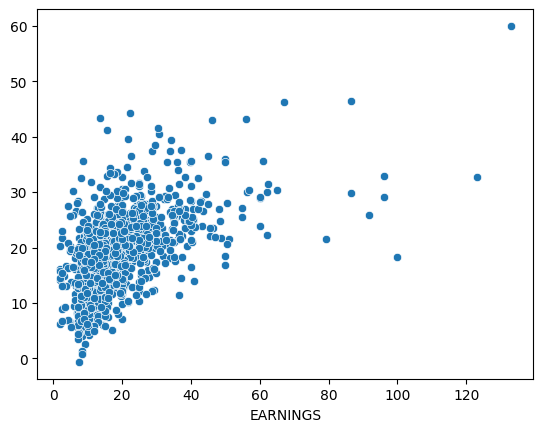

In [277]:
predicted_values = model.predict(X_train)
residuals = (y_train - predicted_values)
sns.scatterplot(x=y_train, y=predicted_values)

<Axes: ylabel='EARNINGS'>

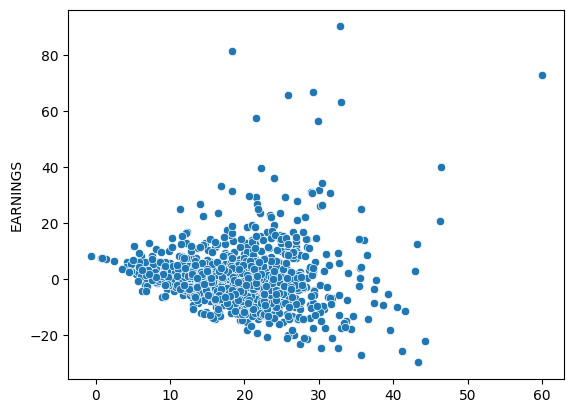

In [278]:
sns.scatterplot(x=predicted_values, y=residuals)

In [279]:
print(residuals.mean())
print(residuals.skew())

-2.2844265681053876e-11
2.636649528414273


# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

In [280]:
Y = df_data.EARNINGS
X = df_data.drop(['EARNINGS'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, np.log(Y), test_size=0.2)

In [281]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Assuming y_true and y_pred are your true and predicted continuous values, respectively
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.2580133474578736
Mean Absolute Error: 0.3664204834146522
R-squared: 0.23961417848807753
